In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
##filename = 'Mearure-planarity-PCB-WURTH-Thin.txt'
filename = 'planarity.txt'
with open(filename, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

for line in lines: print(line.strip())



Elément            Réel       Val. nom.           Ecart       Tol. sup.       Tol. inf.           OK/HT
(Dév PR)        (Tol PR)
Point-1(De 1 pt)
Coord. X =           58,999
Coord. Y =           74,935
Coord. Z =            1,057

Point-2[1,1](De 1 pt)
Coord. X =            0,003
Coord. Y =            0,001
Coord. Z =            0,000

Point-2[1,2](De 1 pt)
Coord. X =            0,003
Coord. Y =           10,001
Coord. Z =            0,003

Point-2[1,3](De 1 pt)
Coord. X =            0,003
Coord. Y =           20,001
Coord. Z =            0,007

Point-2[1,4](De 1 pt)
Coord. X =            0,003
Coord. Y =           30,001
Coord. Z =            0,013

Point-2[1,5](De 1 pt)
Coord. X =            0,003
Coord. Y =           40,001
Coord. Z =            0,018

Point-2[1,6](De 1 pt)
Coord. X =            0,003
Coord. Y =           50,001
Coord. Z =            0,021

Point-2[1,7](De 1 pt)
Coord. X =            0,003
Coord. Y =           60,001
Coord. Z =            0,023

Point-2[1,8](De 1 p

In [3]:
# Skip the first 3 lines (header)
for line in lines[3:-8]:
    print(line.strip())

Point-1(De 1 pt)
Coord. X =           58,999
Coord. Y =           74,935
Coord. Z =            1,057

Point-2[1,1](De 1 pt)
Coord. X =            0,003
Coord. Y =            0,001
Coord. Z =            0,000

Point-2[1,2](De 1 pt)
Coord. X =            0,003
Coord. Y =           10,001
Coord. Z =            0,003

Point-2[1,3](De 1 pt)
Coord. X =            0,003
Coord. Y =           20,001
Coord. Z =            0,007

Point-2[1,4](De 1 pt)
Coord. X =            0,003
Coord. Y =           30,001
Coord. Z =            0,013

Point-2[1,5](De 1 pt)
Coord. X =            0,003
Coord. Y =           40,001
Coord. Z =            0,018

Point-2[1,6](De 1 pt)
Coord. X =            0,003
Coord. Y =           50,001
Coord. Z =            0,021

Point-2[1,7](De 1 pt)
Coord. X =            0,003
Coord. Y =           60,001
Coord. Z =            0,023

Point-2[1,8](De 1 pt)
Coord. X =            0,003
Coord. Y =           70,001
Coord. Z =            0,022

Point-2[1,9](De 1 pt)
Coord. X =          

Coord. X =          130,003
Coord. Y =            0,001
Coord. Z =            0,021

Point-2[14,2](De 1 pt)
Coord. X =          130,003
Coord. Y =           10,001
Coord. Z =            0,021

Point-2[14,3](De 1 pt)
Coord. X =          130,003
Coord. Y =           20,001
Coord. Z =            0,018

Point-2[14,4](De 1 pt)
Coord. X =          130,003
Coord. Y =           30,001
Coord. Z =            0,017

Point-2[14,5](De 1 pt)
Coord. X =          130,003
Coord. Y =           40,001
Coord. Z =            0,015

Point-2[14,6](De 1 pt)
Coord. X =          130,003
Coord. Y =           50,001
Coord. Z =            0,012

Point-2[14,7](De 1 pt)
Coord. X =          130,003
Coord. Y =           60,001
Coord. Z =            0,012

Point-2[14,8](De 1 pt)
Coord. X =          130,003
Coord. Y =           70,001
Coord. Z =            0,013

Point-2[14,9](De 1 pt)
Coord. X =          130,003
Coord. Y =           80,001
Coord. Z =            0,014

Point-2[14,10](De 1 pt)
Coord. X =          130,003

In [4]:
point_ids = []
for line in lines:
    match = re.search(r'\[([\d,]+)\]', line)
    if match:
        point_id = match.group(1)
        point_ids.append(point_id)

# Print the extracted point IDs
for point_id in point_ids:
    print(point_id)

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10
1,11
1,12
1,13
1,14
1,15
1,16
2,1
2,2
2,3
2,4
2,5
2,6
2,7
2,8
2,9
2,10
2,11
2,12
2,13
2,14
2,15
2,16
3,1
3,2
3,3
3,4
3,5
3,6
3,7
3,8
3,9
3,10
3,11
3,12
3,13
3,14
3,15
3,16
4,1
4,2
4,3
4,4
4,5
4,6
4,7
4,8
4,9
4,10
4,11
4,12
4,13
4,14
4,15
4,16
5,1
5,2
5,3
5,4
5,5
5,6
5,7
5,8
5,9
5,10
5,11
5,12
5,13
5,14
5,15
5,16
6,1
6,2
6,3
6,4
6,5
6,6
6,7
6,8
6,9
6,10
6,11
6,12
6,13
6,14
6,15
6,16
7,1
7,2
7,3
7,4
7,5
7,6
7,7
7,8
7,9
7,10
7,11
7,12
7,13
7,14
7,15
7,16
8,1
8,2
8,3
8,4
8,5
8,6
8,7
8,8
8,9
8,10
8,11
8,12
8,13
8,14
8,15
8,16
9,1
9,2
9,3
9,4
9,5
9,6
9,7
9,8
9,9
9,10
9,11
9,12
9,13
9,14
9,15
9,16
10,1
10,2
10,3
10,4
10,5
10,6
10,7
10,8
10,9
10,10
10,11
10,12
10,13
10,14
10,15
10,16
11,1
11,2
11,3
11,4
11,5
11,6
11,7
11,8
11,9
11,10
11,11
11,12
11,13
11,14
11,15
11,16
12,1
12,2
12,3
12,4
12,5
12,6
12,7
12,8
12,9
12,10
12,11
12,12
12,13
12,14
12,15
12,16
13,1
13,2
13,3
13,4
13,5
13,6
13,7
13,8
13,9
13,10
13,11
13,12
13,13
13,14
13,15
13,16
14,1
14,2
14,

In [5]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

skipped_lines = 0
for line in lines:
    if skipped_lines < 3 and not line.startswith('Plan'):
        skipped_lines += 1
        continue
    elif line.startswith('Plan'):
        break
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Print the extracted point data
for point_id, coords in point_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)

Point ID: 1,1
Coordinates: {'X': 0.003, 'Y': 0.001, 'Z': 0.0}
Point ID: 1,2
Coordinates: {'X': 0.003, 'Y': 10.001, 'Z': 0.003}
Point ID: 1,3
Coordinates: {'X': 0.003, 'Y': 20.001, 'Z': 0.007}
Point ID: 1,4
Coordinates: {'X': 0.003, 'Y': 30.001, 'Z': 0.013}
Point ID: 1,5
Coordinates: {'X': 0.003, 'Y': 40.001, 'Z': 0.018}
Point ID: 1,6
Coordinates: {'X': 0.003, 'Y': 50.001, 'Z': 0.021}
Point ID: 1,7
Coordinates: {'X': 0.003, 'Y': 60.001, 'Z': 0.023}
Point ID: 1,8
Coordinates: {'X': 0.003, 'Y': 70.001, 'Z': 0.022}
Point ID: 1,9
Coordinates: {'X': 0.003, 'Y': 80.001, 'Z': 0.022}
Point ID: 1,10
Coordinates: {'X': 0.003, 'Y': 90.001, 'Z': 0.023}
Point ID: 1,11
Coordinates: {'X': 0.003, 'Y': 100.001, 'Z': 0.021}
Point ID: 1,12
Coordinates: {'X': 0.003, 'Y': 110.001, 'Z': 0.018}
Point ID: 1,13
Coordinates: {'X': 0.003, 'Y': 120.001, 'Z': 0.017}
Point ID: 1,14
Coordinates: {'X': 0.003, 'Y': 130.001, 'Z': 0.015}
Point ID: 1,15
Coordinates: {'X': 0.003, 'Y': 140.001, 'Z': 0.011}
Point ID: 2,1
Coo

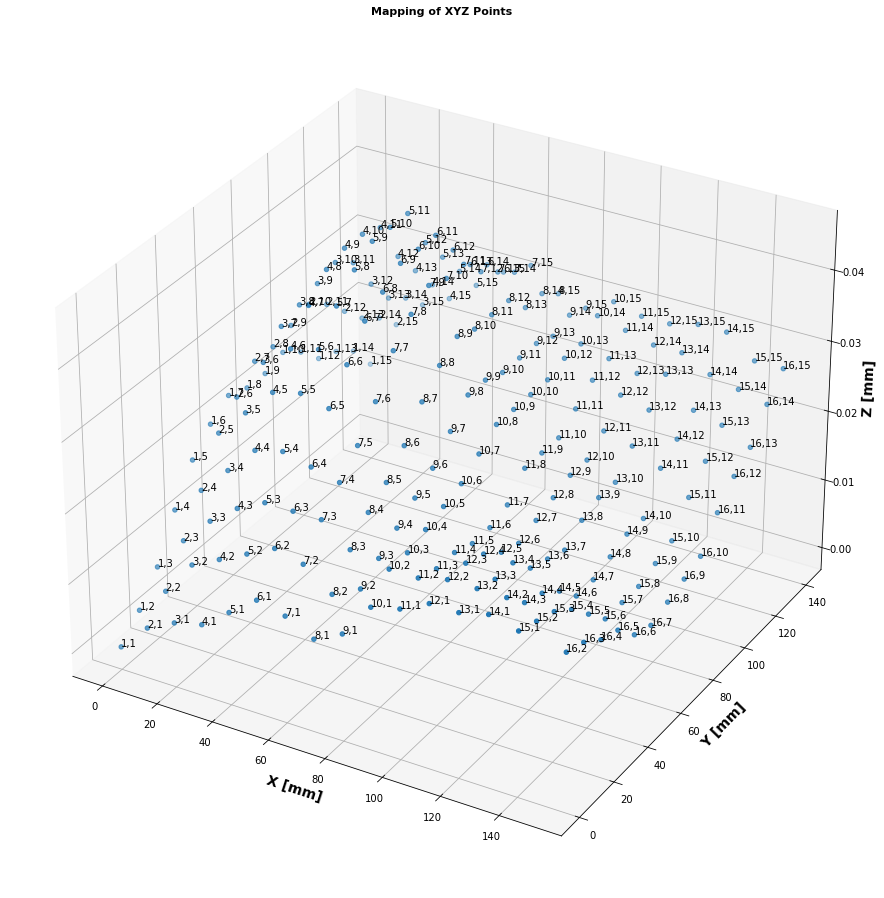

In [6]:
# Extract X, Y, Z values and corresponding point IDs
point_ids = []
x_values = []
y_values = []
z_values = []

for point_id, coords in point_data:
    point_ids.append(point_id)
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Plot the XYZ points relative to their point IDs
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values)

# Label each point with its corresponding ID
for i, point_id in enumerate(point_ids):
    ax.text(x_values[i], y_values[i], z_values[i], point_id)

# Set labels and title
ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
ax.set_ylabel('Y [mm]', fontsize=14, fontweight='bold')
ax.set_zlabel('Z [mm]', fontsize=14, fontweight='bold')
ax.set_title('Mapping of XYZ Points', fontsize=11, fontweight='bold')

plt.show()


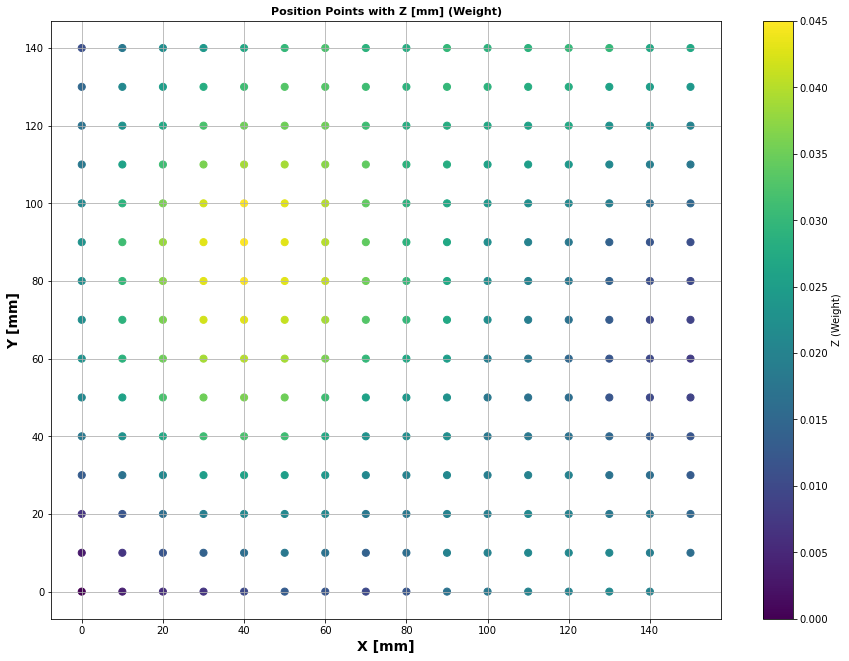

In [7]:
plt.figure(figsize=(15, 11))
plt.scatter(x_values, y_values, c=z_values, cmap='viridis', s=50)
plt.colorbar(label='Z (Weight)')
plt.xlabel('X [mm]' , fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Position Points with Z [mm] (Weight)', fontsize=11, fontweight='bold')
plt.grid(True)
plt.show()

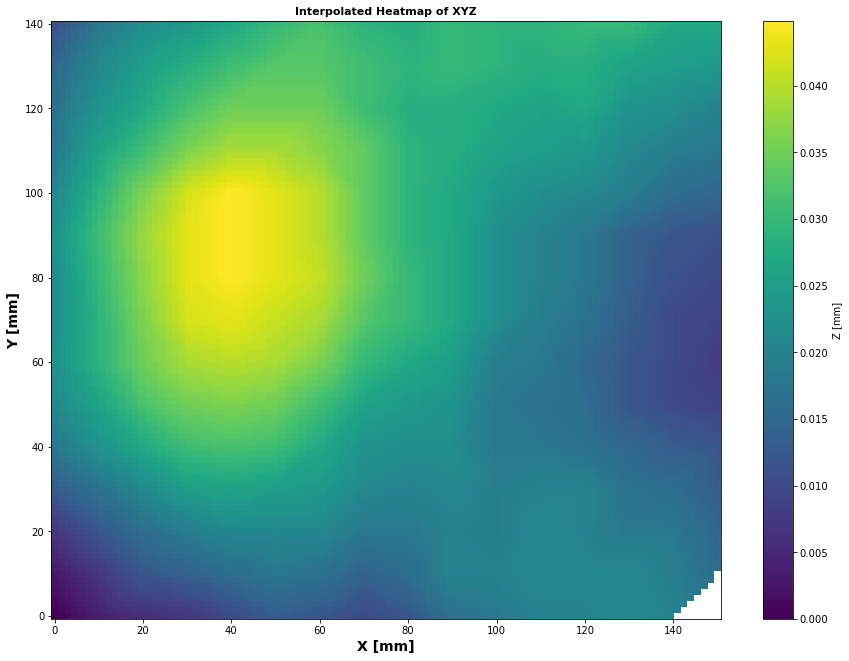

In [8]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')
Z_grid = np.linspace(min(z_values), max(z_values), 100)
#colorbar = plt.colorbar(heatmap, label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))

# Plot the heatmap
plt.figure(figsize=(15, 11))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Interpolated Heatmap of XYZ', fontsize=11, fontweight='bold')
plt.show()

In [9]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS)
rms = np.sqrt(np.mean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap:", rms)

Root Mean Square (RMS) of the heatmap: nan


In [10]:
print(Z_flat)

[0.         0.00060606 0.00121212 ... 0.027      0.027      0.027     ]


In [11]:
# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.026188006097517185


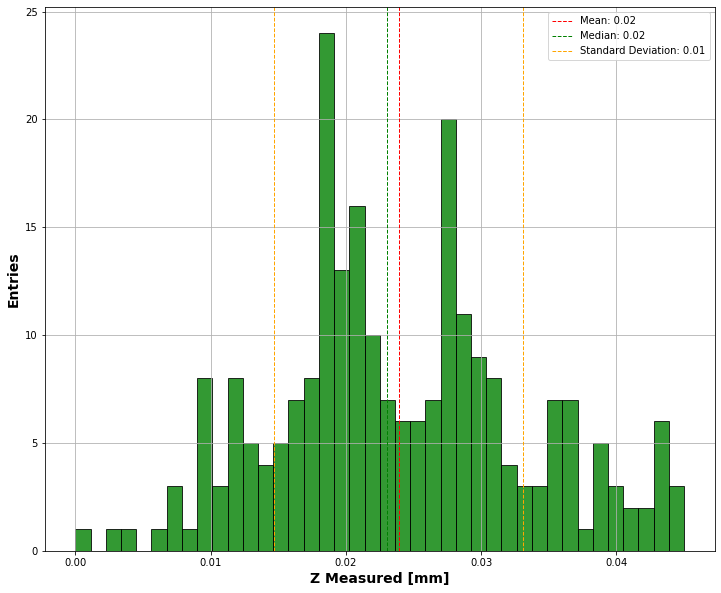

In [12]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(z_values, bins=40, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(z_values)
median_value = np.median(z_values)
std_dev = np.std(z_values)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z Measured [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Entries' , fontsize=14, fontweight='bold')
#plt.title('Histogram of Z Values')
#plt.title('Histogram with Statistics')
plt.grid(True)
plt.show()

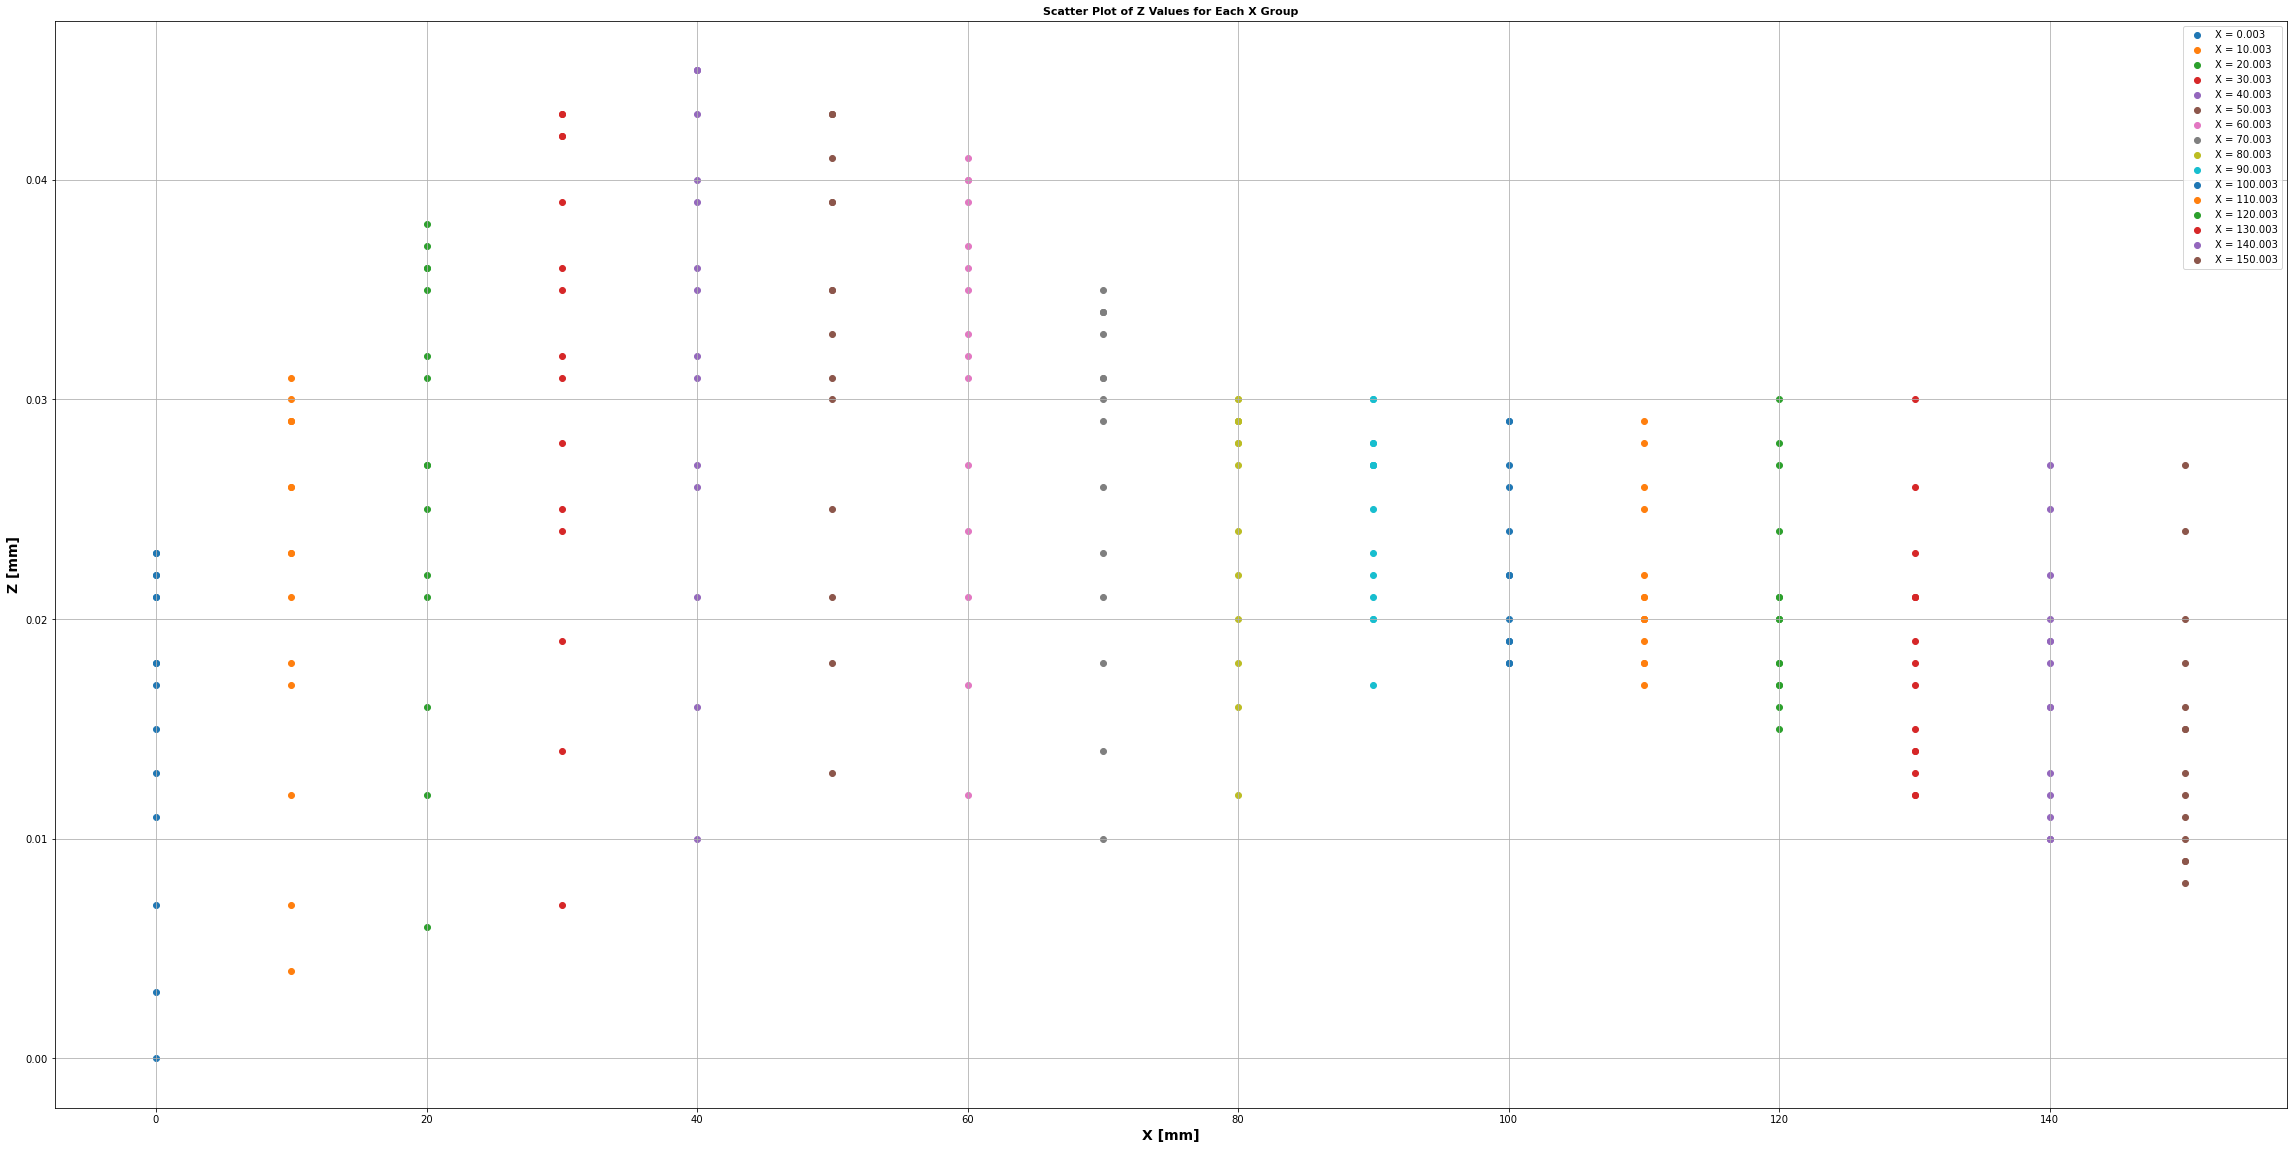

In [13]:
# Group Z values by X values
x_groups = {}
for x, z in zip(x_values, z_values):
    if x not in x_groups:
        x_groups[x] = []
    x_groups[x].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for x, z_group in x_groups.items():
    plt.scatter([x] * len(z_group), z_group, label=f"X = {x}")

plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Z Values for Each X Group', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

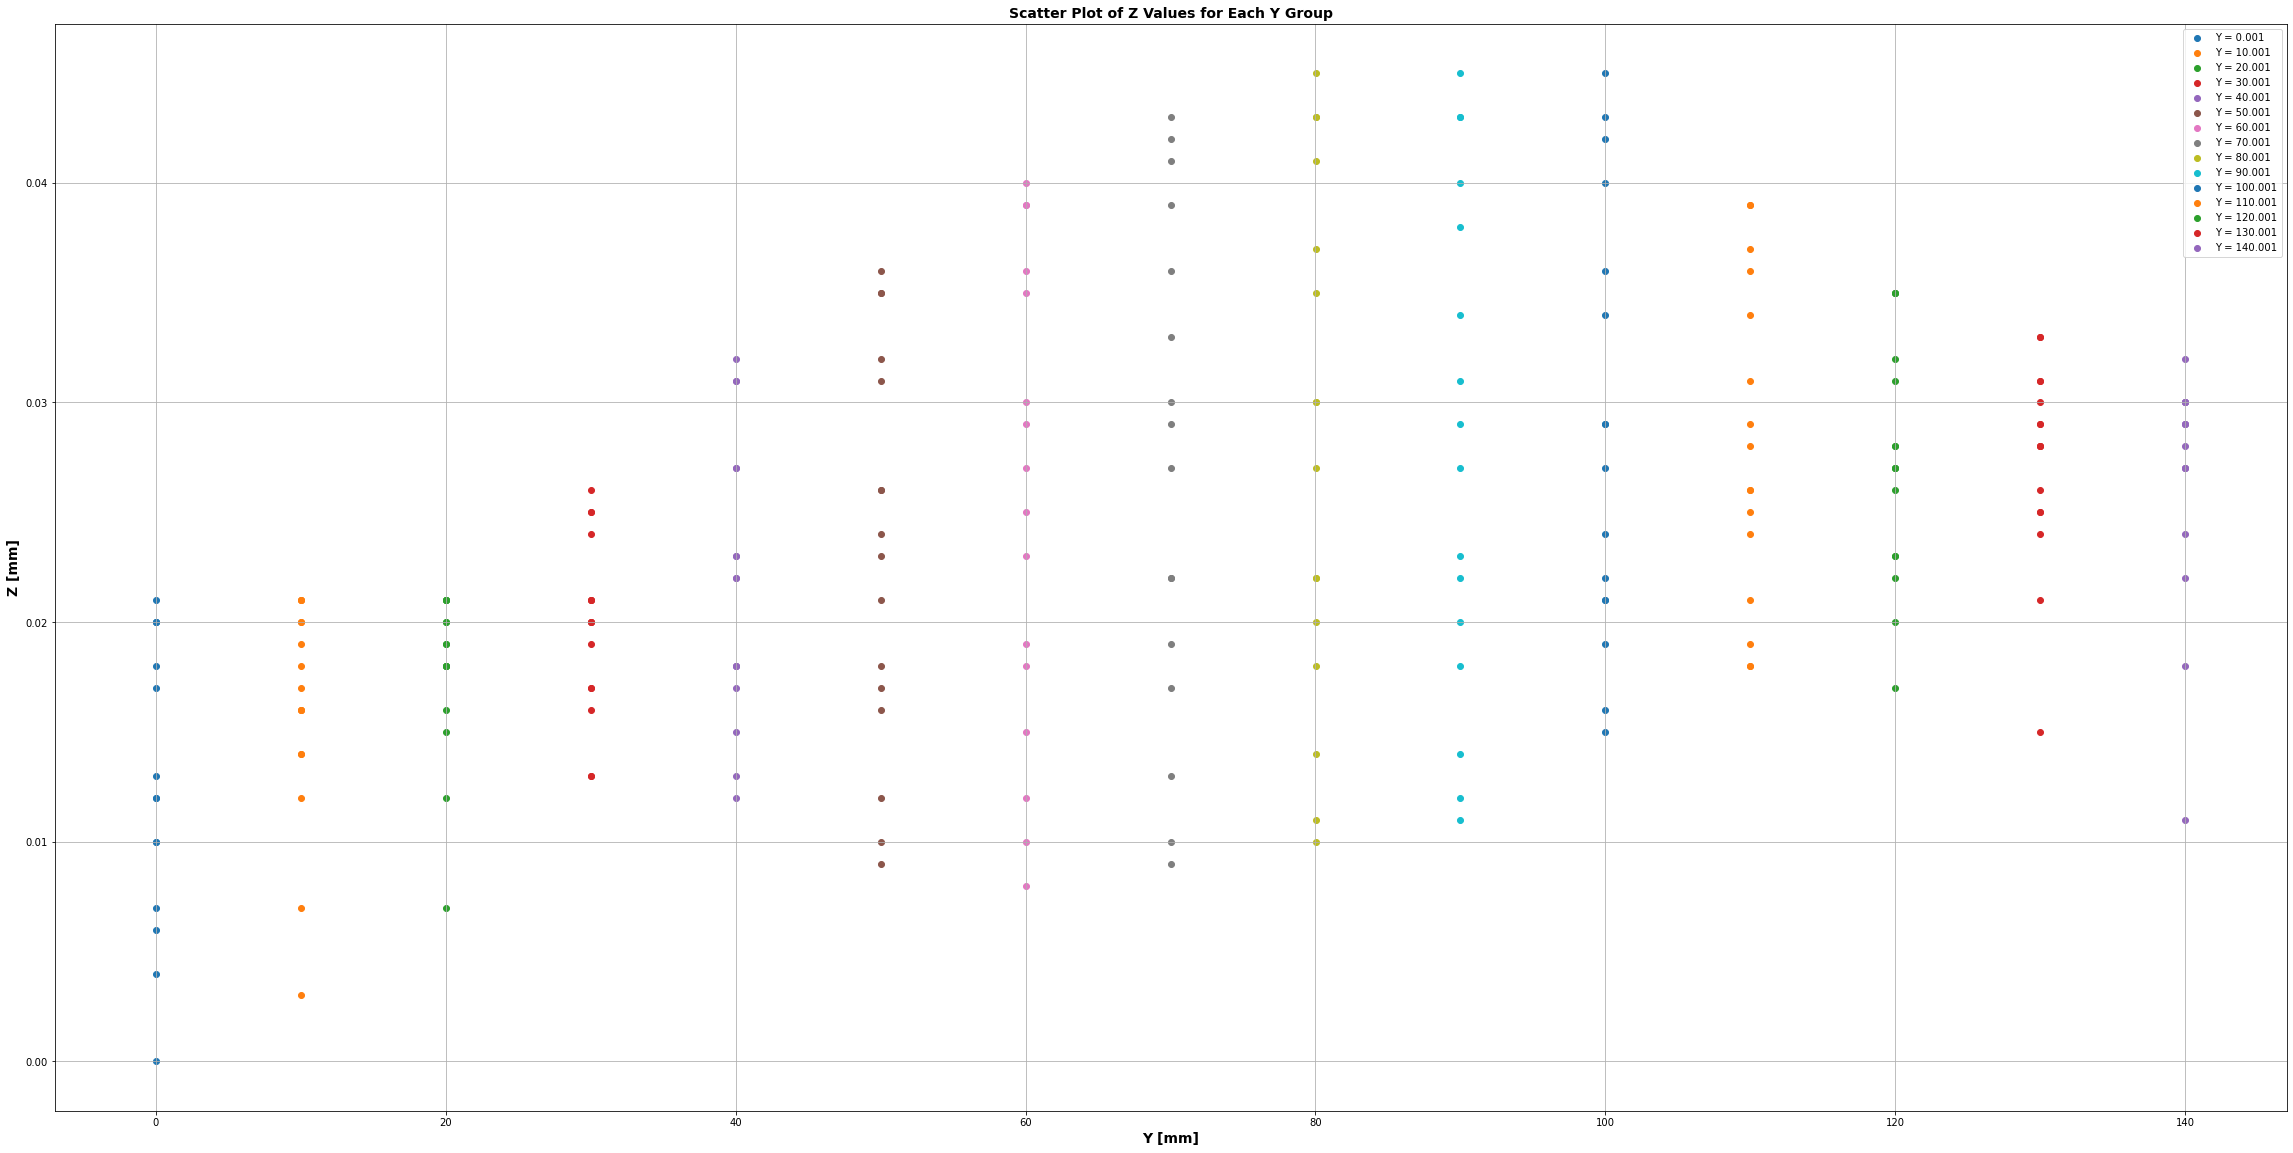

In [14]:
# Group Z values by Y values
y_groups = {}
for y, z in zip(y_values, z_values):
    if y not in y_groups:
        y_groups[y] = []
    y_groups[y].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for y, z_group in y_groups.items():
    indices = range(1, len(z_values) + 1)
    #plt.scatter(indices, z_values, label=f'Y = {y}')

    plt.scatter([y] * len(z_group), z_group, label=f"Y = {y}")

plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Z Values for Each Y Group', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}
skipped_lines = 0
for line in lines:
    if skipped_lines < 3 and not line.startswith('Plan'):
        skipped_lines += 1
        continue
    elif line.startswith('Plan'):
        break

    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Convert the data to the desired format
formatted_data = []
for point_id, coords in point_data:
    formatted_coords = {'X': coords['X'], 'Y': coords['Y'], 'Z': coords['Z']}
    formatted_data.append((point_id, formatted_coords))

# Print the formatted data
for point_id, coords in formatted_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)


Point ID: 1,1
Coordinates: {'X': 0.003, 'Y': 0.001, 'Z': 0.0}
Point ID: 1,2
Coordinates: {'X': 0.003, 'Y': 10.001, 'Z': 0.003}
Point ID: 1,3
Coordinates: {'X': 0.003, 'Y': 20.001, 'Z': 0.007}
Point ID: 1,4
Coordinates: {'X': 0.003, 'Y': 30.001, 'Z': 0.013}
Point ID: 1,5
Coordinates: {'X': 0.003, 'Y': 40.001, 'Z': 0.018}
Point ID: 1,6
Coordinates: {'X': 0.003, 'Y': 50.001, 'Z': 0.021}
Point ID: 1,7
Coordinates: {'X': 0.003, 'Y': 60.001, 'Z': 0.023}
Point ID: 1,8
Coordinates: {'X': 0.003, 'Y': 70.001, 'Z': 0.022}
Point ID: 1,9
Coordinates: {'X': 0.003, 'Y': 80.001, 'Z': 0.022}
Point ID: 1,10
Coordinates: {'X': 0.003, 'Y': 90.001, 'Z': 0.023}
Point ID: 1,11
Coordinates: {'X': 0.003, 'Y': 100.001, 'Z': 0.021}
Point ID: 1,12
Coordinates: {'X': 0.003, 'Y': 110.001, 'Z': 0.018}
Point ID: 1,13
Coordinates: {'X': 0.003, 'Y': 120.001, 'Z': 0.017}
Point ID: 1,14
Coordinates: {'X': 0.003, 'Y': 130.001, 'Z': 0.015}
Point ID: 1,15
Coordinates: {'X': 0.003, 'Y': 140.001, 'Z': 0.011}
Point ID: 2,1
Coo

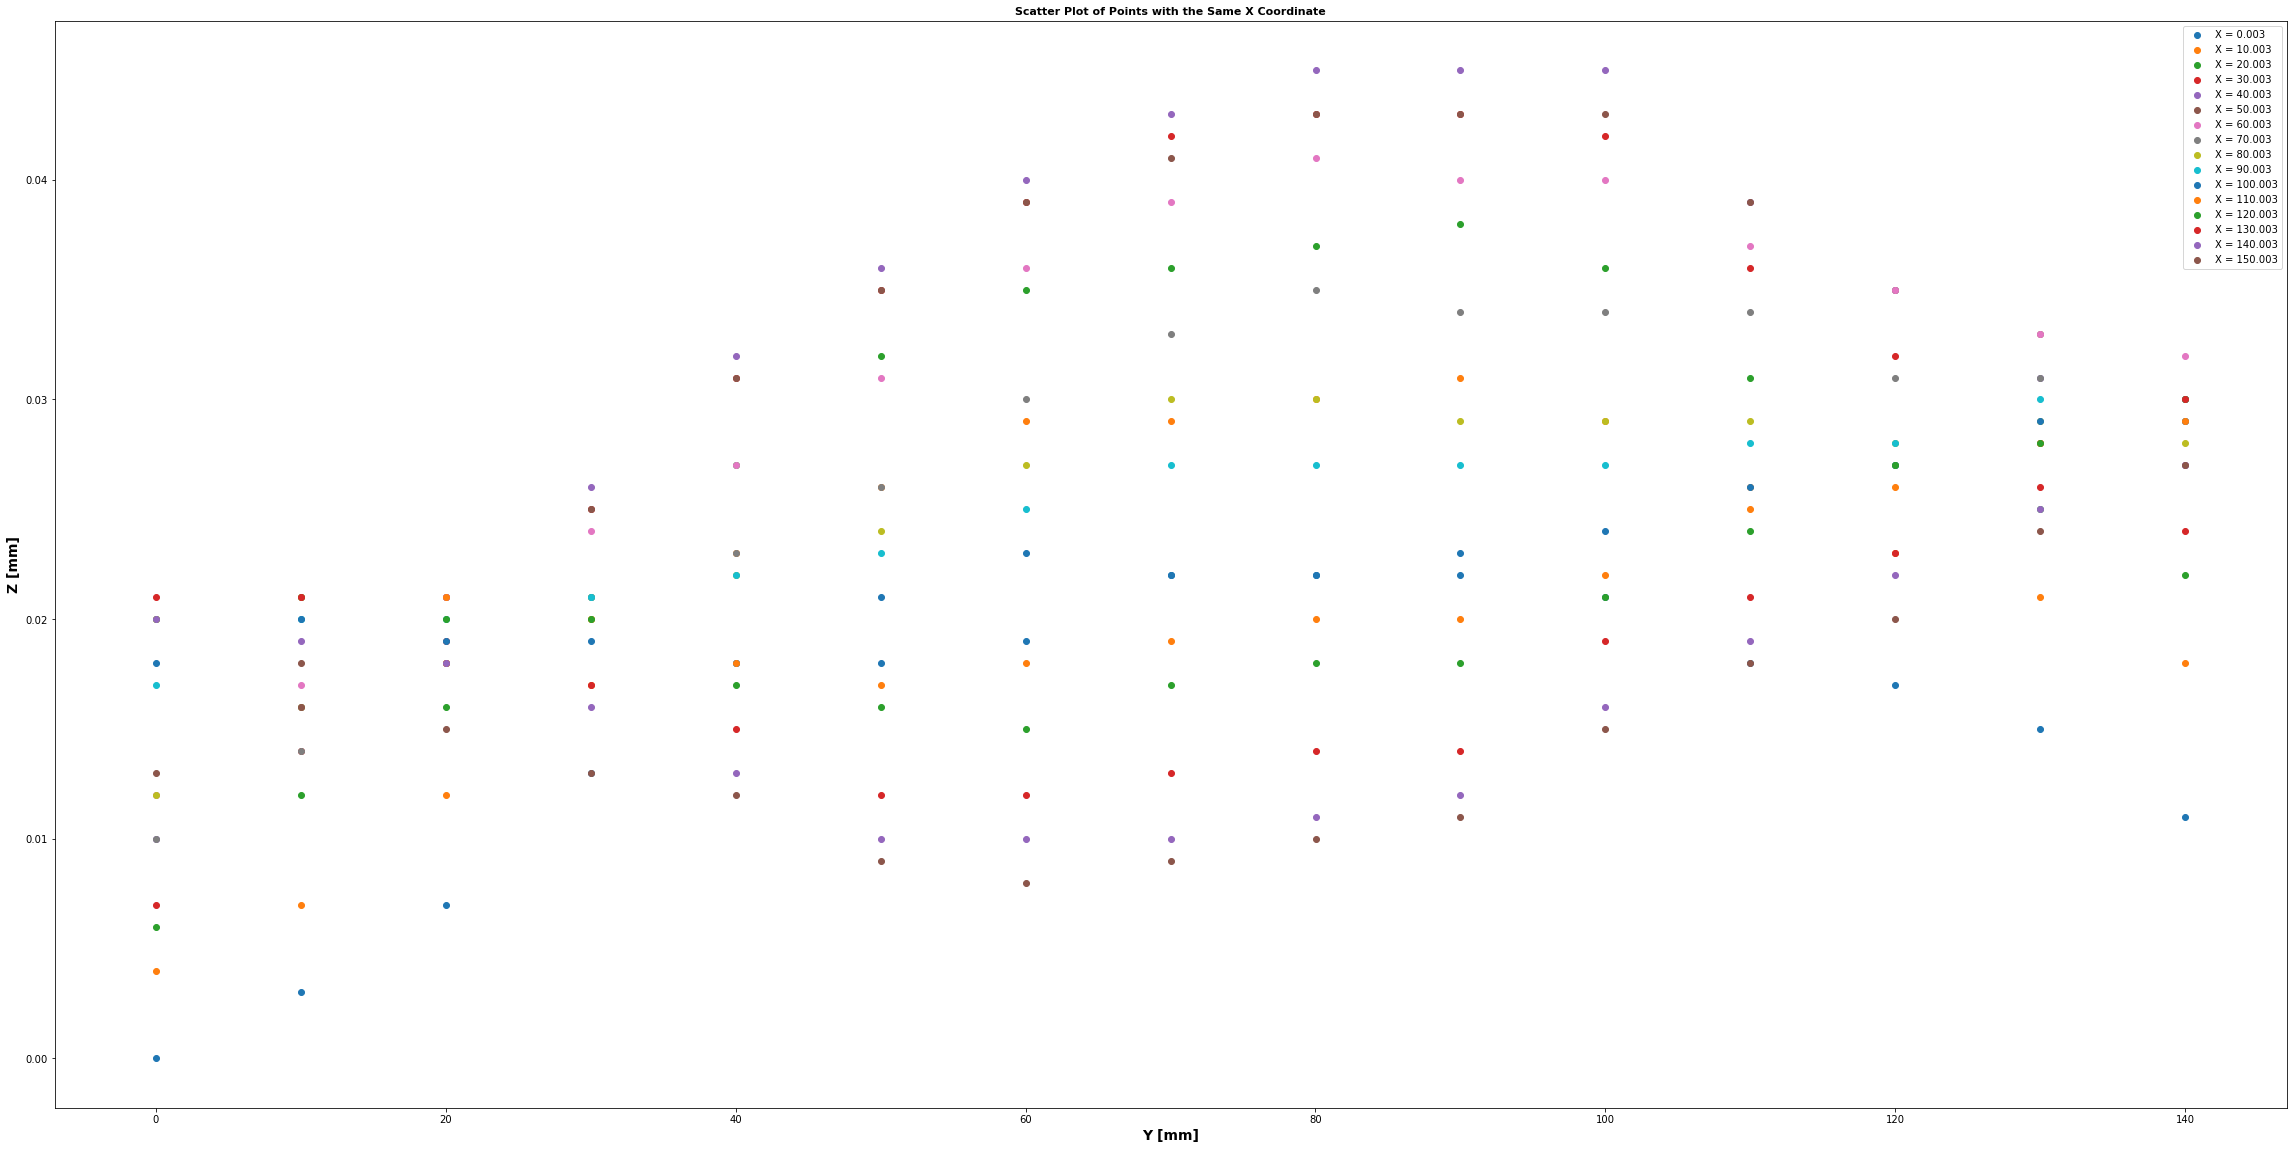

In [16]:
# Group the data by X coordinate
plt.figure(figsize=(40, 20))

grouped_data = {}
for point_id, coords in formatted_data:
    x_coord = coords['X']
    if x_coord not in grouped_data:
        grouped_data[x_coord] = []
    grouped_data[x_coord].append((point_id, coords['Y'], coords['Z']))

# Plot each group separately
for x, points in grouped_data.items():
    point_ids, ys, zs = zip(*points)
    plt.scatter(ys, zs, label=f'X = {x}')

# Add labels and legend
plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Points with the Same X Coordinate', fontsize=11, fontweight='bold')
plt.legend()
plt.show()

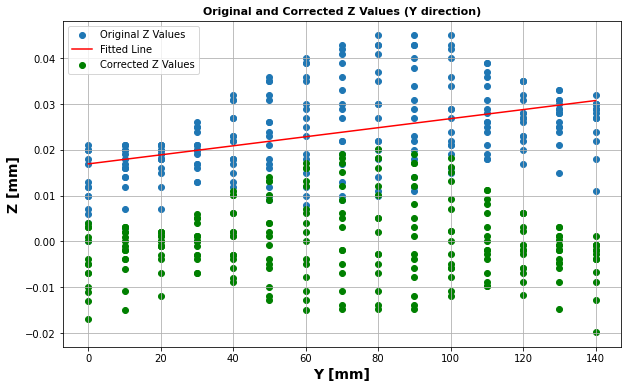

In [17]:
# Extract X, Y, and Z values from the data
x_values = []
y_values = []
z_values = []
for position, coords in formatted_data:
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Perform linear regression to fit a line to the data
slope_y, intercept_y = np.polyfit(y_values, z_values, 1)

# Calculate the fitted line
fitted_line_y = slope_y * np.array(y_values) + intercept_y

# Subtract the fitted line from the original Z values to correct for the slope in the Y direction
corrected_z_values_y = np.array(z_values) - fitted_line_y

# Plot the original and corrected Z values
plt.figure(figsize=(10, 6))
plt.scatter(y_values, z_values, label='Original Z Values')
plt.plot(y_values, fitted_line_y, color='red', label='Fitted Line')
plt.scatter(y_values, corrected_z_values_y, color='green', label='Corrected Z Values')
plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Original and Corrected Z Values (Y direction)', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

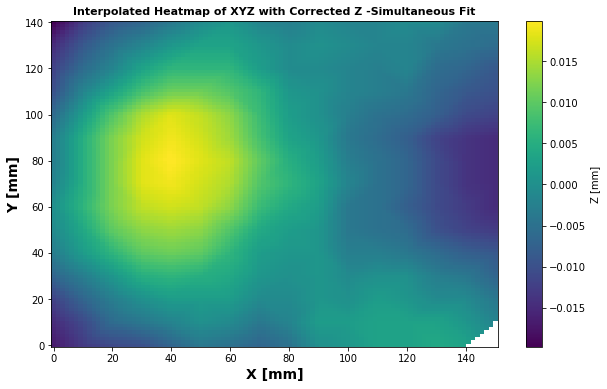

In [18]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Interpolated Heatmap of XYZ with Corrected Z -Simultaneous Fit', fontsize=11, fontweight='bold')
plt.show()

In [32]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap Simultaneous Fit:", rms)

Root Mean Square (RMS) of the heatmap Simultaneous Fit: 0.007925184721636263


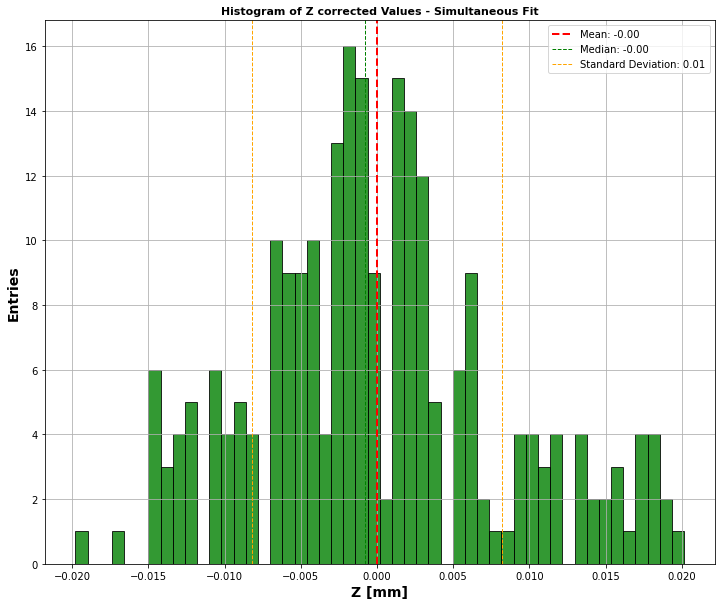

In [20]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(corrected_z_values_y, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(corrected_z_values_y)
median_value = np.median(corrected_z_values_y)
std_dev = np.std(corrected_z_values_y)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Entries', fontsize=14, fontweight='bold')
plt.title('Histogram of Z corrected Values - Simultaneous Fit', fontsize=11, fontweight='bold')
plt.grid(True)
plt.show()

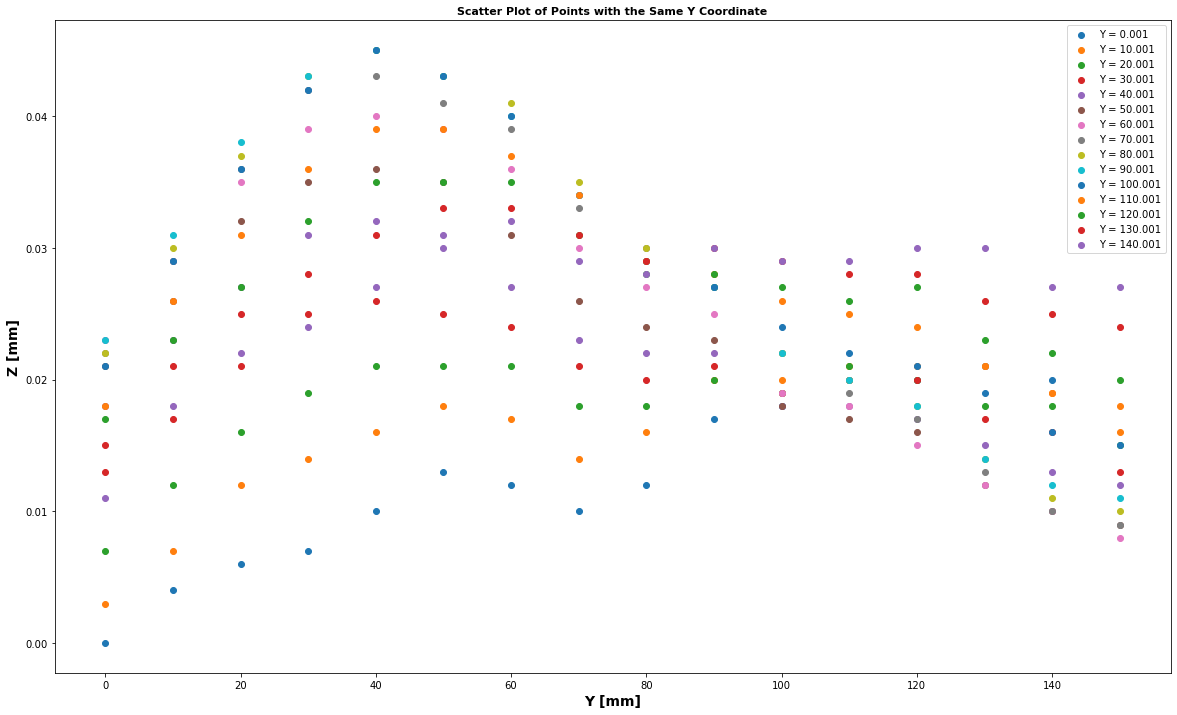

In [21]:
# Group the data by X coordinate
plt.figure(figsize=(20, 12))

grouped_data = {}
for point_id, coords in formatted_data:
    y_coord = coords['Y']
    if y_coord not in grouped_data:
        grouped_data[y_coord] = []
    grouped_data[y_coord].append((point_id, coords['X'], coords['Z']))

# Plot each group separately
for y, points in grouped_data.items():
    point_ids, xs, zs = zip(*points)
    plt.scatter(xs, zs, label=f'Y = {y}')

# Add labels and legend
plt.xlabel('Y [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Z [mm]', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Points with the Same Y Coordinate', fontsize=11, fontweight='bold')
plt.legend()
plt.show()

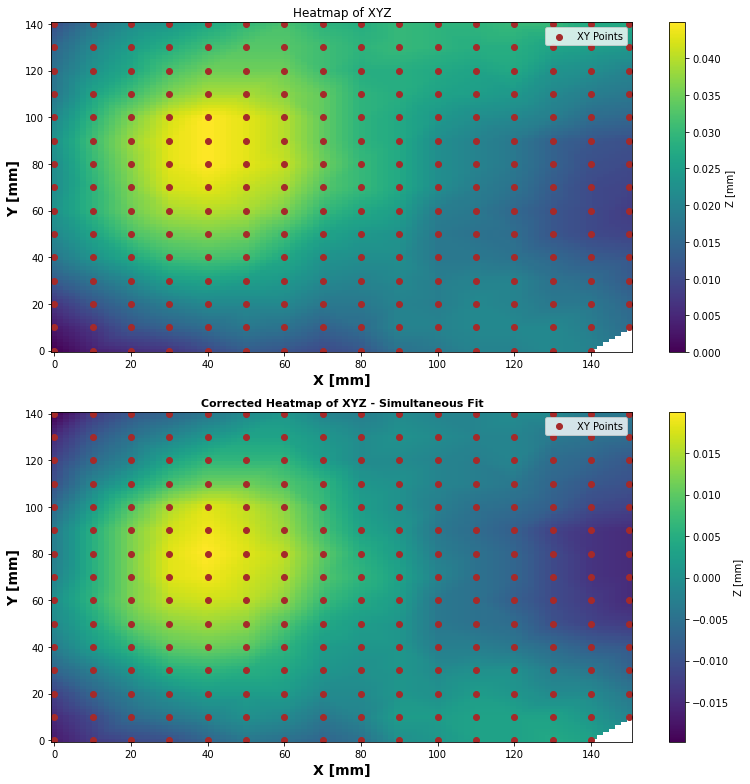

In [22]:
plt.figure(figsize=(11, 11))

Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')

# Plot the heatmap
plt.subplot(2, 1, 1)
im = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(im, label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Heatmap of XYZ')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()

Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the scatter plot
plt.subplot(2, 1, 2)
sc = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(sc, label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Corrected Heatmap of XYZ - Simultaneous Fit', fontsize=11, fontweight='bold')
# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()


plt.tight_layout()
plt.show()

## Fitting Plane

In [23]:
def fit_plane(formatted_data):   
    # Extract X, Y, and Z coordinates from the formatted data 
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Construct the design matrix contains the independent variables
    A = np.vstack((X, Y, np.ones_like(X))).T #stacking X, Y, and a column of ones (for the intercept term) vertically and transposing it. 
    #This design matrix is used in the least squares regression.
    
    # Perform least squares regression to find the plane parameters
    #params, _, _, _ = np.linalg.lstsq(A, Z, rcond=None) 
    params, residuals, rank, singular_values = np.linalg.lstsq(A, Z, rcond=None)

    #contains the coefficients of the plane equation (a, b, c) that minimize the sum of squared residuals.
    #assigned to _ to indicate that they're being ignored.
    
    # Extract plane parameters (coefficients of the plane equation: ax + by + c = z)
    a, b, c = params
    residuals = residuals  #the residual sum of squares, which represents the sum of squared differences between the observed and predicted values of Z
    singular_values = singular_values # the singular values of A
    return a, b, c, residuals, singular_values

a, b, c, residuals, singular_values = fit_plane(formatted_data)
print("Plane parameters: a =", a, ", b =", b, ", c =", c, ", residuals = ", residuals, ", singular values = ", singular_values)


Plane parameters: a = -6.071799792367952e-05 , b = 9.959322993676682e-05 , c = 0.021425396368295203 , residuals =  [0.01414273] , singular values =  [1730.78190536  682.81436921    6.18350069]


In [24]:
# Visualize the fitted plane and original points
def visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values):
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Create a meshgrid for X and Y coordinates
    X_grid, Y_grid = np.meshgrid(np.linspace(min(X), max(X), 10), np.linspace(min(Y), max(Y), 10))
    
    # Calculate Z values for the fitted plane
    Z_plane = a * X_grid + b * Y_grid + c

    # Plot the points
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, color='b', label='Original Points')
    
    # Plot the fitted plane
    ax.plot_surface(X_grid, Y_grid, Z_plane, alpha=0.5, color='r', label='Fitted Plane')
    
    # Set labels and title
    ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
    ax.set_ylabel('Y [mm]', fontsize=14, fontweight='bold')
    ax.set_zlabel('Z [mm]', fontsize=14, fontweight='bold')
    ax.set_title('Planarity Fitted Plane', fontsize=11, fontweight='bold')
    
    # Add legend
    ax.legend()
    
    # Show plot
    plt.show()

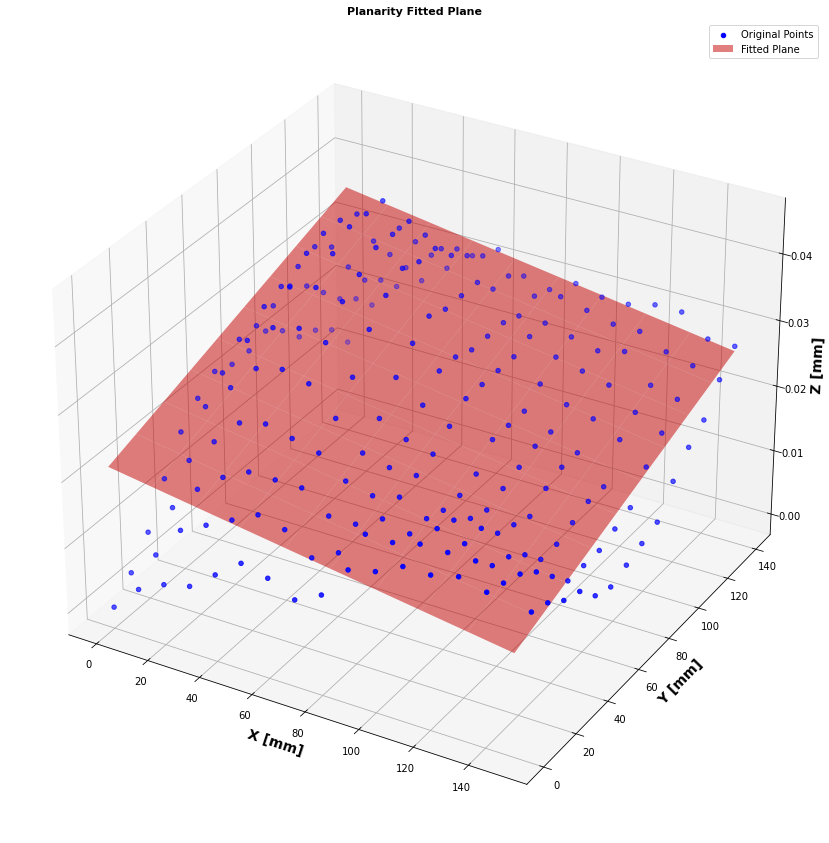

In [25]:
#a, b, c = fit_plane(formatted_data)
a, b, c, residuals, singular_values = fit_plane(formatted_data)
#visualize_plane_and_points(formatted_data, a, b, c)
visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values)

In [26]:
def calculate_planarity_metrics(formatted_data, a, b, c):
    # Extract X, Y, and Z coordinates from the formatted data
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Calculate distances from points to the fitted plane
    distances = np.abs(a * X + b * Y - Z + c) / np.sqrt(a**2 + b**2 + 1)
    
    # Calculate RMS of the distances
    rms_distance = np.sqrt(np.mean(distances**2))
    
    # Calculate deviation of the points from the plane
    deviation = distances.mean()
    
    return rms_distance, deviation

In [27]:
rms_distance, deviation = calculate_planarity_metrics(formatted_data, a, b, c)
print("RMS Distance:", rms_distance) #the root mean square (RMS) of the distances between the data points and the fitted plane
print("Deviation:", deviation) #the deviation of the data points from the plane


RMS Distance: 0.007692502876410613
Deviation: 0.005808401950563927


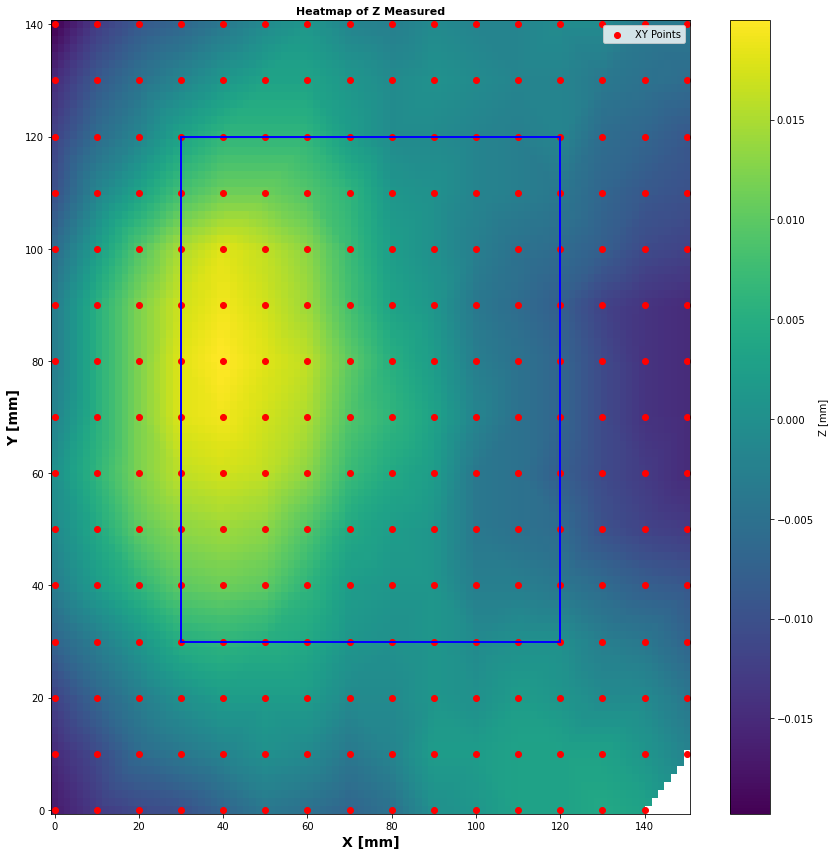

In [28]:
# Define the point IDs
point_4_4_id = '4,4'
point_4_13_id = '4,13'
point_13_4_id = '13,4'
point_13_13_id = '13,13'


# Find the XY coordinates corresponding to the specified point IDs
point_4_4_xy = None
point_4_13_xy = None
point_13_4_xy = None
point_13_13_xy = None

for point_id, coords in formatted_data:
    if point_id == point_4_4_id:
        point_4_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_4_13_id:
        point_4_13_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_4_id:
        point_13_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_13_id:
        point_13_13_xy = (coords['X'], coords['Y'])

# Plot the heatmap of Z
plt.figure(figsize=(12, 12))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Heatmap of Z Measured', fontsize=11, fontweight='bold')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')

# Connect specified points with lines
plt.plot([point_4_13_xy[0], point_13_13_xy[0]], [point_4_13_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2)
plt.plot([point_13_4_xy[0], point_13_13_xy[0]], [point_13_4_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_4_13_xy[0]], [point_4_4_xy[1], point_4_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_13_4_xy[0]], [point_4_4_xy[1], point_13_4_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular

plt.legend()
plt.tight_layout()
plt.show()


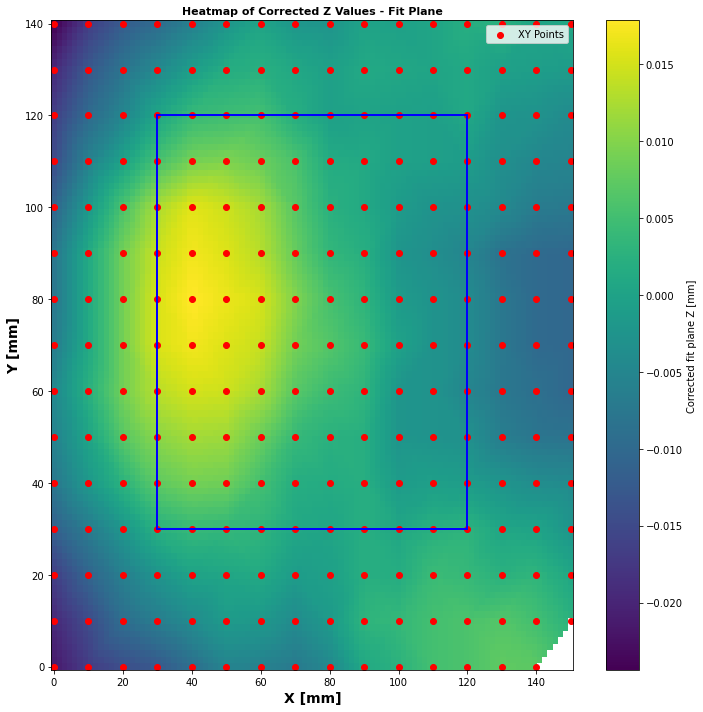

In [29]:
x_values = np.array([coords['X'] for _, coords in formatted_data])
y_values = np.array([coords['Y'] for _, coords in formatted_data])
z_values = np.array([coords['Z'] for _, coords in formatted_data])

# Correct the Z values based on the fitted plane
corrected_z_values = z_values - (a * x_values + b * y_values + c)

# Create a grid for the heatmap
X, Y = np.meshgrid(np.linspace(min(x_values), max(x_values), 100),
                   np.linspace(min(y_values), max(y_values), 100))

# Interpolate the corrected Z values onto the grid
Z_corrected = griddata((x_values, y_values), corrected_z_values, (X, Y), method='linear')


# Plot the heatmap of corrected Z values
plt.figure(figsize=(10, 10))
plt.pcolormesh(X, Y, Z_corrected, cmap='viridis')
plt.colorbar(label='Corrected fit plane Z [mm]')
plt.xlabel('X [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Y [mm]', fontsize=14, fontweight='bold')
plt.title('Heatmap of Corrected Z Values - Fit Plane', fontsize=11, fontweight='bold')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')
# Connect specified points with lines
plt.plot([point_4_13_xy[0], point_13_13_xy[0]], [point_4_13_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2)
plt.plot([point_13_4_xy[0], point_13_13_xy[0]], [point_13_4_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_4_13_xy[0]], [point_4_4_xy[1], point_4_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_13_4_xy[0]], [point_4_4_xy[1], point_13_4_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular

plt.legend()
plt.tight_layout()
plt.show()

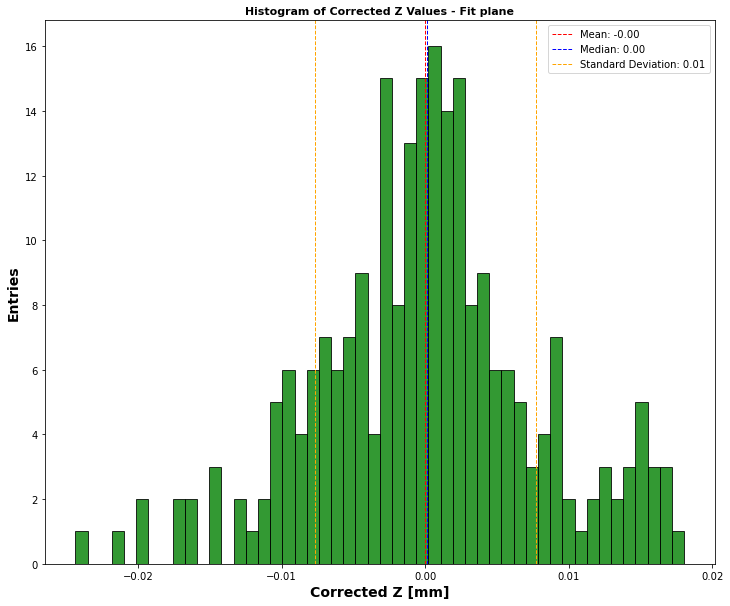

In [30]:
# Flatten the 2D array Z_corrected into a 1D array
Z_corrected_flat = corrected_z_values.flatten()

# Plot the histogram of the corrected Z values
plt.figure(figsize=(12, 10))
plt.hist(Z_corrected_flat, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(Z_corrected_flat)
median_value = np.median(Z_corrected_flat)
std_deviation = np.std(Z_corrected_flat)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_deviation:.2f}')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=1)
plt.xlabel('Corrected Z [mm]', fontsize=14, fontweight='bold')
plt.ylabel('Entries', fontsize=14, fontweight='bold')
plt.title('Histogram of Corrected Z Values - Fit plane', fontsize=11, fontweight='bold')
plt.legend()
plt.show()

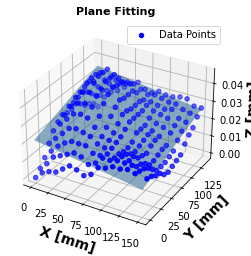

In [31]:
X_test = np.column_stack((x_values, y_values, np.ones_like(x_values)))

# Fit linear regression model
model = LinearRegression().fit(X_test, z_values)

# Get the coefficients (normal vector) of the plane
normal_vector = model.coef_
intercept = model.intercept_

# Generate points on the plane for visualization
x_plane = np.linspace(min(x_values), max(x_values), 10)
y_plane = np.linspace(min(y_values), max(y_values), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = normal_vector[0] * x_plane + normal_vector[1] * y_plane + intercept

# Plot the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, c='b', marker='o', label='Data Points')

# Plot the plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('X [mm]', fontsize=14, fontweight='bold')
ax.set_ylabel('Y [mm]', fontsize=14, fontweight='bold')
ax.set_zlabel('Z [mm]', fontsize=14, fontweight='bold')
ax.set_title('Plane Fitting', fontsize=11, fontweight='bold')

plt.legend()
plt.show()
